In [49]:
import numpy as np
from matplotlib import pyplot as plt

In [50]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [51]:
def polynomial(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * x**i
    return result

# Полиномиальная регрессия

In [52]:
def polynomial_coeffs(n):
    xx = np.linspace(1, 15, n)
    yy = f(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

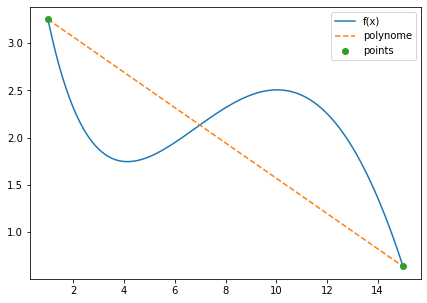

In [53]:
n = 2
w = polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.figure(figsize=(7, 5))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

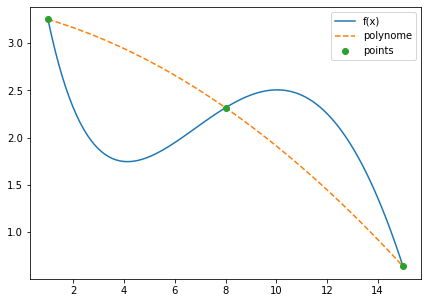

In [54]:
n = 3
w = polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.figure(figsize=(7, 5))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

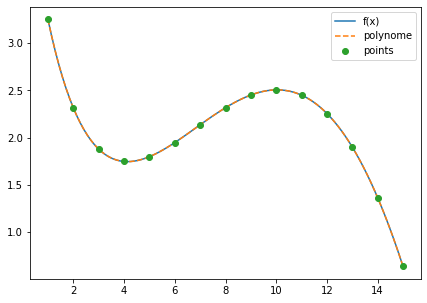

In [55]:
n = 15
w = polynomial_coeffs(n)
xx = np.linspace(1, 15, 100)
plt.figure(figsize=(7, 5))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
x_points = np.linspace(1, 15, n)
y_points = f(x_points)
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

# Полиномиальная регрессия с шумом

In [56]:
def compute_polynomial_coeffs_with_noise(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, n))
    for i in range(n):
        A[:,i] = xx**i
    return np.linalg.solve(A, b)

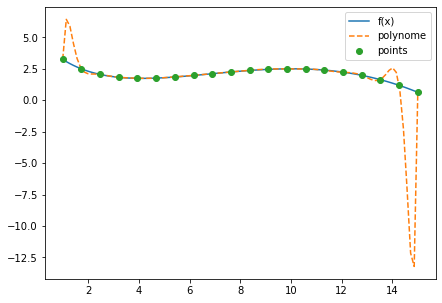

In [60]:
n = 20
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs_with_noise(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.figure(figsize=(7, 5))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

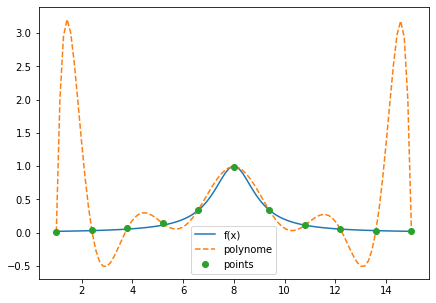

In [61]:
def f1(x):
    return 1 / ((x-8)**2 + 1)

n = 11
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f1(x_points) + np.random.randn(n) * noise

w = compute_polynomial_coeffs_with_noise(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.figure(figsize=(7, 5))
plt.plot(xx, f1(xx), label='f(x)')
xx = np.linspace(1, 15, 100)
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()

# Метод наименьших квадратов

In [62]:
def MNK_coeff(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.zeros((n, 4))
    for i in range(4):
        A[:,i] = xx**i
    A_T = np.zeros((4, n))
    for i in range(4):
        A_T[i] = A[:, i]
    AA_T = A_T.dot(A)
    AA_T_inv = np.linalg.inv(AA_T)
    A_ps_inv = AA_T_inv.dot(A_T)
    return A_ps_inv.dot(b)

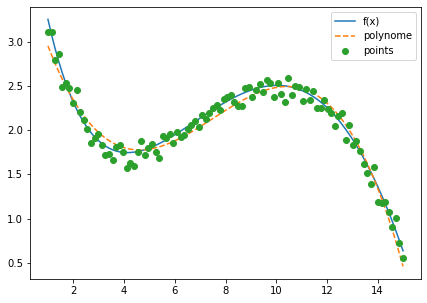

In [63]:
n = 100
noise = 0.1
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise

w = MNK_coeff(x_points, y_points)

xx = np.linspace(1, 15, 100)
plt.figure(figsize=(7, 5))
plt.plot(xx, f(xx), label='f(x)')
plt.plot(xx, polynome(w, xx), '--', label='polynome')
plt.plot(x_points, y_points, 'o', label='points')
plt.legend()